# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [1]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch
import torchvision.datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
scale=0.3
torch.manual_seed(1727564)

transform = transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [2]:
#add noise to trainset&&testset
trainset_noise_data=trainset.data+(scale*torch.randn(50000,32,32,3)).numpy()*50
#keep the origin data
trainset_origin_data=trainset.data
#keep the targets of the trainset_label
trainset_y=np.array(trainset.targets)
testset_noise_data=testset.data+(scale*torch.randn(10000,32,32,3)).numpy()*50
testset_origin_data=testset.data
testset_y=np.array(testset.targets)

In [3]:
#become original range
trainset_noise_data=np.clip(trainset_noise_data,0,255).astype('uint8')
testset_noise_data=np.clip(testset_noise_data,0,255).astype('uint8')

#get the cat and dog class
train_catdog_origin_data = trainset_origin_data[(trainset_y[:]==3) | (trainset_y[:]==5) ]

train_catdog_noise_data = trainset_noise_data[(trainset_y[:]==3) | (trainset_y[:]==5) ]
#this is the target of tarainset
train_catdog_data_target= trainset_y[(trainset_y[:]==3) | (trainset_y[:]==5) ]

#this is the cat and dog origin test class
test_catdog_origin_data=testset_origin_data[(testset_y[:]==3)|(testset_y[:]==5)]
#this is the cat and dog nosie test class
test_catdog_noise_data=testset_noise_data[(testset_y[:]==3)|(testset_y[:]==5)]

#this is the cat and dog test target
test_catdog_data_target=testset_y[(testset_y[:]==3)|(testset_y[:]==5)]

10 pictures of original and noise CATS&&DOGS 


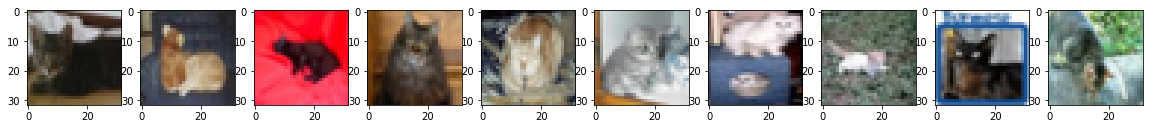

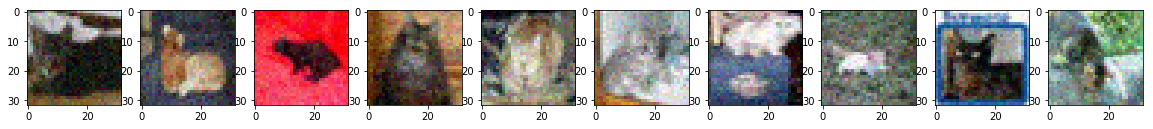

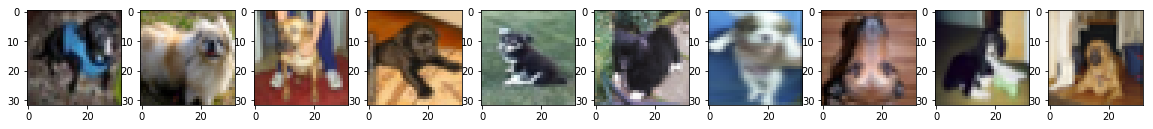

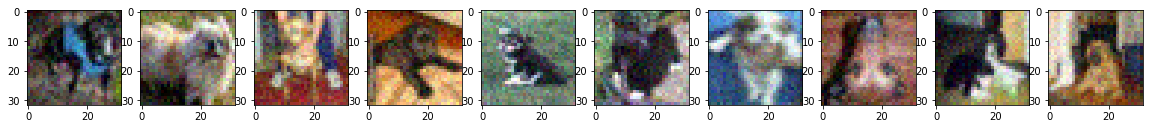

In [4]:
#get the index of cat  and dog for print 10 picture
templist=train_catdog_data_target[:50]
cat_list=list()
for i in range(len(templist)):
    if(templist[i]==3):
        cat_list.append(i)
cat_list=cat_list[:10]
dog_list=list()
for i in range(len(templist)):
    if(templist[i]==5):
        dog_list.append(i)
dog_list=dog_list[:10]

def showimage(trainset,listname):
    plt.figure(figsize=(20,20))
    for i in range(len(cat_list)):
        plt.subplot(1,10,i+1)
        plt.imshow(trainset[listname[i]])
print('10 pictures of original and noise CATS&&DOGS ')
showimage(train_catdog_origin_data,cat_list)
showimage(train_catdog_noise_data,cat_list)
showimage(train_catdog_origin_data,dog_list)
showimage(train_catdog_noise_data,dog_list)   

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [5]:
# Write the code for your answer here. You can use multiple cells to improve readability.
#convert 10000*32*32*3        to      10000*3072
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA 
picture_number=train_catdog_origin_data.shape[0]
picture_x,picture_y,rgb=train_catdog_origin_data.shape[1:]
x_train_catdog_origin_data_reshape=train_catdog_origin_data.reshape((picture_number,picture_x*picture_y*rgb))
x_label=train_catdog_origin_data
y_label=train_catdog_data_target
# strictly the size of range should be from 1 to 3072, while my computer can not do this  so I just pick some vital numbers
tem_seven_list=list()
#get the various of feature keep in the original type
list_radio=[0.3,0.4,0.5,0.6,0.7,0.8,0.9]
def getlist(data,number):
    pca_mnist = PCA(n_components=number).fit(data)
    return pca_mnist.n_components_
for i in list_radio:
    tem_seven_list.append(getlist(x_train_catdog_origin_data_reshape,i))

In [6]:
print("the seven values are ",tem_seven_list)
#the is the model fit in the original data
model_origin=GaussianNB()
model_origin.fit(x_train_catdog_origin_data_reshape,y_label)
print("The GaussianNB model fit in the original cat_dog_data: ",model_origin.score(x_train_catdog_origin_data_reshape,y_label))
print("The reason why I choose those number is that the number of those values represent the Retained value of original feature，\
      0.3，0.4，0.5，0.6，0.7，0.8，0.9, These values are scattered, and it is better to compare the results retained by different eigenvalues. " )

the seven values are  [2, 3, 4, 8, 15, 32, 87]
The GaussianNB model fit in the original cat_dog_data:  0.6003
The reason why I choose those number is that the number of those values represent the Retained value of original feature，      0.3，0.4，0.5，0.6，0.7，0.8，0.9, These values are scattered, and it is better to compare the results retained by different eigenvalues. 


In [7]:
# n_components_num: the components
#data: the type of data should be change 
#label: that is the original target
#return: the score, model, newdata
def pcatest(n_components_num,data,lable):
    model=GaussianNB()
    pca = PCA(n_components=n_components_num)
    newData = pca.fit_transform(data)
    model.fit(newData,lable)
    return model.score(newData,lable),model,newData

In [8]:
#use the list to store the newData
list_newData=list()
#use the list to store the scores
showPca_train=list()
#use the list to store the models
list_model_train=list()
for i in tem_seven_list:
    score,model,newData=pcatest(i,x_train_catdog_origin_data_reshape,y_label)
    list_model_train.append(model)
    list_newData.append(newData)
    showPca_train.append(score)
def print_info(list1,list2):
    for i in range(len(list1)):
        print("k= ",list1[i],"  score= ",list2[i])

In [9]:
print("Get the result in the train_cat_dog")
print("k= 0   score=0.6003",)
print_info(tem_seven_list,showPca_train)

Get the result in the train_cat_dog
k= 0   score=0.6003
k=  2   score=  0.5636
k=  3   score=  0.5733
k=  4   score=  0.5784
k=  8   score=  0.5837
k=  15   score=  0.5984
k=  32   score=  0.6202
k=  87   score=  0.5992


In [10]:
#get the testset result of  catdog
test_target_size=len(test_catdog_data_target)
number=test_catdog_origin_data.shape[0]
h_height, w_weighth,rgb=test_catdog_origin_data.shape[1:]
#reshape the structure of the test_catdog
test_catdog_origin_data_reshape=test_catdog_origin_data.reshape(number,h_height*w_weighth*rgb)
test_origin_target_pridict=model_origin.predict(test_catdog_origin_data_reshape)
print("the original GaussianNB in testset_catdog",(test_catdog_data_target==test_origin_target_pridict).sum()/test_target_size)

the original GaussianNB in testset_catdog 0.5935


In [11]:
#get the testet of catdog
def get_newdata(data,demission):
    pca = PCA(n_components=demission)
    newData = pca.fit_transform(data)
    return newData

In [12]:
#use the list_newdata_test_catdog to store the newdata
list_newdata_test_catdog=list()
for i in range(len(tem_seven_list)):
    list_newdata_test_catdog.append(get_newdata(test_catdog_origin_data_reshape,tem_seven_list[i]))

In [13]:
#use the scores_in_test_catdog to store score
scores_in_test_catdog=list()
#the method return the radio of the right prediction
def get_score(model,data):
    predict_target=model.predict(data)
    sum_right=0
    for i in range(len(test_catdog_data_target)):
        if (predict_target[i]==test_catdog_data_target[i]):sum_right=sum_right+1
    return sum_right/test_target_size

for i in range(len(tem_seven_list)):
    scores_in_test_catdog.append(get_score(list_model_train[i],list_newdata_test_catdog[i]))
print("Get the result in the test_catdog ")
print("k=  0  score=  0.5935")
print_info(tem_seven_list,scores_in_test_catdog)

Get the result in the test_catdog 
k=  0  score=  0.5935
k=  2   score=  0.566
k=  3   score=  0.565
k=  4   score=  0.576
k=  8   score=  0.5535
k=  15   score=  0.545
k=  32   score=  0.5515
k=  87   score=  0.5475


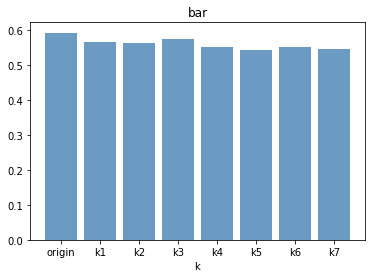

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#  make data
y_data=list()
#add the first data
y_data.append(0.5935)
for i in range(len(tem_seven_list)): 
    y_data.append(scores_in_test_catdog[i])
x_data =['origin','k1','k2','k3','k4','k5','k6','k7']
# plot it
plt.bar(x=x_data, height=y_data,  color='steelblue', alpha=0.8)
plt.title("bar")
plt.xlabel("k")
plt.show()

In [54]:
tem_seven_list

[2, 3, 4, 8, 15, 32, 87]

In [15]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
#get the nparameters 
def getallparameters(model,data,label):
    origin=model.predict_proba(data)[:,1:2]
    fpr,tpr,thrshold=roc_curve(label,origin,pos_label=5)
    auc=roc_auc_score(test_catdog_data_target,origin)
    return fpr,tpr,auc
#plot data
def plot_roc(fpr,tpr,color,label):
    lw=2
    plt.plot(fpr,tpr,color,lw=lw,label=label)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
list_fpr=list()
list_tpr=list()
list_auc=list()
for i in range(len(tem_seven_list)):
    fpr,tpr,auc=getallparameters(list_model_train[i],list_newdata_test_catdog[i],test_catdog_data_target)
    list_fpr.append(fpr)
    list_tpr.append(tpr)
    list_auc.append(auc)
fpr,tpr,auc=getallparameters(model_origin,test_catdog_origin_data_reshape,test_catdog_data_target)
list_auc.append(auc)

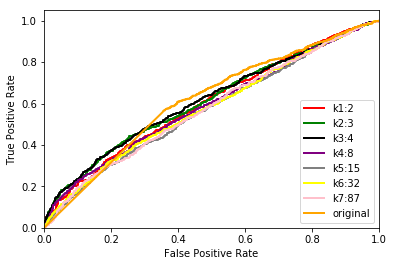

In [16]:
plt.figure()
label=["k1:2","k2:3","k3:4","k4:8","k5:15","k6:32","k7:87","original"]
colors=["red","green","black","purple","grey","yellow","pink","orange"]
for i in range(len(list_fpr)):
    plot_roc(list_fpr[i],list_tpr[i],colors[i],label[i])
plot_roc(fpr,tpr,colors[7],label[7])

<BarContainer object of 8 artists>

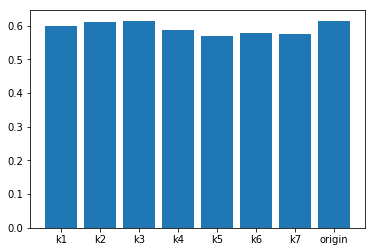

In [17]:
plt.figure()
x_data =['k1','k2','k3','k4','k5','k6','k7','origin']
plt.bar(x=x_data, height=list_auc)

Question 2F

    1. The model always predicts better on the original data，When reducing the original data to some Dimensions, there will be some feature to be losed, So when the dataset do not have too many dimensions, we can predict directely.


    2.The roc auc in the origin data show the best. while when the dimesions become too high, the score will be steady. That means some of the feature will have few influence for the prediction.
    
    3.after doing the dimesion, the feature can not be recongnised, so in this lab, the dimension in the 8 can fit the testdata well, while higher the dimension the score can not be higher clearly.

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [18]:
# Write the code for your answer here. You can use multiple cells to improve readability.
from sklearn.metrics import confusion_matrix
test_catdog_noise_data_reshape=test_catdog_noise_data.reshape(test_catdog_noise_data.shape[0],
                                                              test_catdog_noise_data.shape[1]*test_catdog_noise_data.shape[2]*
                                                             test_catdog_noise_data.shape[3])
#reconstructe the data
train_catdog_noise_data_reshape=train_catdog_noise_data.reshape(train_catdog_noise_data.shape[0],
                                                              train_catdog_noise_data.shape[1]*train_catdog_noise_data.shape[2]*train_catdog_noise_data.shape[3])
#store the model_catdog data
list_new_nosie_model_catdog=list()
#store the catdog parameter
list_test_catdog_fpr=list()
list_test_catdog_tpr=list()
list_test_catdog_auc=list()
list_new_nosie_train_data=list()
list_new_nosie_test_data=list()
#get the the new model of Gau
for i in range(len(tem_seven_list)):
    score,model,newdata=pcatest(tem_seven_list[i],train_catdog_noise_data_reshape,train_catdog_data_target)
    list_new_nosie_model_catdog.append(model)
    list_new_nosie_train_data.append(newdata)
#get the new data of testset_catdog
for i in range(len(tem_seven_list)):
    list_new_nosie_test_data.append(get_newdata(test_catdog_noise_data_reshape,tem_seven_list[i]))
#get the fpr,tpr
for i in range(len(tem_seven_list)):
    fpr,tpr,auc=getallparameters(list_new_nosie_model_catdog[i],list_new_nosie_test_data[i],test_catdog_data_target)
    list_test_catdog_fpr.append(fpr)
    list_test_catdog_tpr.append(tpr)
    list_test_catdog_auc.append(auc)

In [19]:
#get the origin Gau
model_ori_noise=GaussianNB()
model_ori_noise.fit(train_catdog_noise_data_reshape,train_catdog_data_target)
Gau_orign_train_noise=model_ori_noise.score(train_catdog_noise_data_reshape,train_catdog_data_target)
Gau_origin_test_noise=get_score(model_ori_noise,test_catdog_noise_data_reshape)
print("score in train:",Gau_orign_train_noise,"score in test",Gau_origin_test_noise)

score in train: 0.5997 score in test 0.5945


In [20]:
#get the nosiy fpr,noise, auc
fpr_noise,tpr_noise,auc_noise=getallparameters(model_ori_noise,test_catdog_noise_data_reshape,test_catdog_data_target)

In [21]:
score_test_nosie_catadog=list()
for i in range(len(tem_seven_list)):
    score_test_nosie_catadog.append(get_score(list_new_nosie_model_catdog[i],list_new_nosie_test_data[i]))
print("k=  0  score=",Gau_origin_test_noise)
print_info(tem_seven_list,score_test_nosie_catadog)


k=  0  score= 0.5945
k=  2   score=  0.5625
k=  3   score=  0.566
k=  4   score=  0.5765
k=  8   score=  0.555
k=  15   score=  0.546
k=  32   score=  0.5505
k=  87   score=  0.543


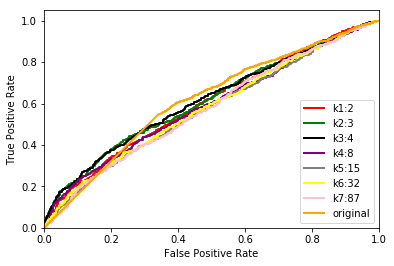

In [22]:
plt.figure()
label=["k1:2","k2:3","k3:4","k4:8","k5:15","k6:32","k7:87","original"]
colors=["red","green","black","purple","grey","yellow","pink","orange"]
for i in range(len(list_fpr)):
    plot_roc(list_test_catdog_fpr[i],list_test_catdog_tpr[i],colors[i],label[i])
plot_roc(fpr_noise,tpr_noise,colors[7],label[7])

<BarContainer object of 8 artists>

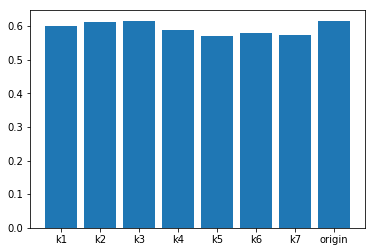

In [23]:
plt.figure()
list_test_catdog_auc.append(auc_noise)
x_data =['k1','k2','k3','k4','k5','k6','k7','origin']
plt.bar(x=x_data, height=list_test_catdog_auc)

In [24]:
#reshape the trainset data
trainset_origin_data_reshape=trainset_origin_data.reshape(trainset_origin_data.shape[0],
                                                          trainset_origin_data.shape[1]*trainset_origin_data.shape[2]*trainset_origin_data.shape[3])
#reshape the testset data
testset_origin_data_reshape=testset_origin_data.reshape(testset_origin_data.shape[0],
                                                          testset_origin_data.shape[1]*testset_origin_data.shape[2]*testset_origin_data.shape[3])
#store three number
tem_three_list=list()
#get the various of feature keep in the original type
list_radio_final=[0.8,0.9,0.95]
def getlist(data,number):
    pca_mnist = PCA(n_components=number).fit(data)
    return pca_mnist.n_components_
for i in list_radio_final:
    tem_three_list.append(getlist(trainset_origin_data_reshape,i))

In [25]:
#get the original model
all_set_model=GaussianNB()
time_start_Gau=time.time()
all_set_model.fit(trainset_origin_data_reshape,trainset_y)
time_finish_Gau=time.time()
#time used in fit original
time_used_Gau_origin=time_finish_Gau-time_start_Gau

In [26]:
#store al the Gau model
list_model_alltest=list()
#store all the new train data
list_train_newdata=list()
#store all the new test data 
list_test_newdata=list()
list_test_newdata_fpr=list()
list_test_newdata_tpr=list()
list_test_newdata_auc=list()
# get the newdata train
for i in range(len(tem_three_list)):
    list_train_newdata.append(get_newdata(trainset_origin_data_reshape,tem_three_list[i]))
print("get three model of trainset successfully")
#get the newdat test
for i in range(len(tem_three_list)):
    list_test_newdata.append(get_newdata(testset_origin_data_reshape,tem_three_list[i]))
print("get the new data of testset successfully")


get three model of trainset successfully
get the new data of testset successfully


In [27]:
#get the fit time in every model
def get_Gau_model_time(data,label):
    model=GaussianNB()
    time_start=time.time()
    model.fit(data,label)
    time_finish=time.time()
    time_used=time_finish-time_start
    return model,time_used

In [28]:
#store the time fit in Gau
time_used_Gau_all_fit=list()
#add the original time 
time_used_Gau_all_fit.append(time_used_Gau_origin)
for i in range(len(tem_three_list)):
    model,timeused=get_Gau_model_time(list_train_newdata[i],trainset_y)
    list_model_alltest.append(model)
    time_used_Gau_all_fit.append(timeused)
print("time used in fit trainset", time_used_Gau_all_fit)

time used in fit trainset [3.6801953315734863, 0.09094667434692383, 0.17527461051940918, 0.34868645668029785]


In [29]:
#to store the mat_Gao
mat_Gao=list()
time_Gau_origin_start_predict=time.time()
temp_right=all_set_model.predict(testset_origin_data_reshape)
time_Gau_origin_finish_predict=time.time()
#get the original confusin matrix
mat0_Gau=confusion_matrix(temp_right,testset_y)

time_Gau_origin_predcit=time_Gau_origin_finish_predict-time_Gau_origin_start_predict
mat_Gao.append(mat0_Gau)

In [30]:
import time
from sklearn.metrics import confusion_matrix
score_Gaus=list()
score_Gaus.append(all_set_model.score(testset_origin_data_reshape,testset_y))
time_Gaus_test=list()
time_Gaus_test.append(time_Gau_origin_predcit)
def getscore_Gaus(model,data,testset_y):
    time_start=time.time()
    temp_right=(model.predict(data))
    mat_Gau=confusion_matrix(temp_right,testset_y)
    time_finish=time.time()
    return (temp_right==testset_y).sum()/len(testset_y), time_finish-time_start,mat_Gau
for i in range(len(tem_three_list)):
    score,time_used,mat_Gau=getscore_Gaus(list_model_alltest[i],list_test_newdata[i],testset_y)
    mat_Gao.append(mat_Gau)
    score_Gaus.append(score)
    time_Gaus_test.append(time_used)

print("time used in fit trainset", time_used_Gau_all_fit)
print("score in test Gau ",score_Gaus)
print("time used in predict in testset Gau",time_Gaus_test)    
print("the map is ",mat_Gao)


time used in fit trainset [3.6801953315734863, 0.09094667434692383, 0.17527461051940918, 0.34868645668029785]
score in test Gau  [0.2976, 0.2656, 0.2342, 0.2225]
time used in predict in testset Gau [5.508072137832642, 0.08235478401184082, 0.18611478805541992, 0.40940022468566895]
the map is  [array([[494, 141, 225, 163,  86, 156, 106, 134, 168, 144],
       [ 20, 166,  24,  36,   8,  17,   2,  24,  41,  67],
       [ 39,  24,  83,  54,  57,  55,  60,  36,  18,  17],
       [ 10,  31,  15,  76,  26,  51,  18,  41,  17,  20],
       [ 84,  66, 292, 151, 417, 167, 228, 228,  56,  48],
       [ 34,  72,  48, 129,  38, 264,  46,  94,  83,  32],
       [ 50, 192, 209, 262, 265, 159, 467, 102,  39, 101],
       [  9,  19,  21,  26,  22,  36,  15, 131,   8,  23],
       [200, 121,  54,  34,  50,  57,  19,  72, 471, 141],
       [ 60, 168,  29,  69,  31,  38,  39, 138,  99, 407]], dtype=int64), array([[259,  36,  84,  75,  39,  61,  42,  49, 132,  52],
       [ 55, 285,  47,  61,  32,  49,  44,

In [31]:
from sklearn.linear_model.logistic import LogisticRegression
def getclassfication(data,label):
    model=LogisticRegression(solver='lbfgs',
                          multi_class='multinomial')
    time_start=time.time()
    model.fit(data,label)
    time_finish=time.time()
    time_used=time_finish-time_start
    return time_used,model
time_used_fit0,model_Logis0=getclassfication(trainset_origin_data_reshape,trainset_y)
time_used_fit1,model_Logis1=getclassfication(list_train_newdata[0],trainset_y)
time_used_fit2,model_Logis2=getclassfication(list_train_newdata[1],trainset_y)
time_used_fit3,model_Logis3=getclassfication(list_train_newdata[2],trainset_y)
list_Logistic=[model_Logis1,model_Logis2,model_Logis3]
list_fit_time_Log=[time_used_fit0,time_used_fit1,time_used_fit2,time_used_fit3]
time_origin_start_Logistic=time.time()
model_Logis0.predict(testset_origin_data_reshape)
time_origin_finish_Logistic=time.time()
time_origin_used_Logistic=time_origin_finish_Logistic-time_origin_start_Logistic

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [32]:
score_Logis=list()
mat_logis_all=list()
score_Logis.append((model_Logis0.predict(testset_origin_data_reshape)==testset_y).sum()/len(testset_y))
mat_Logis_origin=confusion_matrix (testset_y,(model_Logis0.predict(testset_origin_data_reshape)))
mat_logis_all.append(mat_Logis_origin)
time_used_predict_Logis=list()
time_used_predict_Logis.append(time_origin_used_Logistic)
for i in range(len(tem_three_list)):
    score,time_used,mat_Logis=getscore_Gaus(list_Logistic[i],list_test_newdata[i],testset_y)
    score_Logis.append(score)
    mat_logis_all.append(mat_Logis) 
    time_used_predict_Logis.append(time_used)
print("time used in fit",list_fit_time_Log)
print("time used in predict",time_used_predict_Logis )
print("score Logis in testset",score_Logis)
print("mat is",mat_logis_all)

time used in fit [54.579906940460205, 4.44486927986145, 5.570383310317993, 8.062639236450195]
time used in predict [0.20413589477539062, 0.03147721290588379, 0.022734642028808594, 0.04687237739562988]
score Logis in testset [0.4024, 0.2235, 0.2001, 0.1994]
mat is [array([[484,  46,  56,  41,  22,  30,  22,  50, 176,  73],
       [ 62, 486,  14,  32,  22,  35,  35,  52,  95, 167],
       [121,  44, 272,  85, 112,  93, 136,  68,  48,  21],
       [ 43,  56,  99, 257,  52, 192, 121,  54,  48,  78],
       [ 65,  23, 133,  58, 289,  95, 148, 125,  33,  31],
       [ 51,  46,  88, 151,  86, 342,  85,  78,  44,  29],
       [ 12,  33,  74, 117, 100,  87, 485,  40,  21,  31],
       [ 49,  49,  65,  50,  89,  79,  51, 442,  44,  82],
       [172,  77,  18,  27,  10,  51,   8,  16, 520, 101],
       [ 88, 190,  17,  20,  16,  28,  39,  48, 107, 447]], dtype=int64), array([[285,  46, 144, 112,  64, 125,  64,  85, 135,  67],
       [ 62, 220,  39, 103,  51,  69,  82, 100, 108, 154],
       [111,

In [33]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [34]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
temp_CNN_time=0
for epoch in range(1):  # loop over the dataset multiple times
    time_start=time.time()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    time_finish_cnn=time.time()
    temp_CNN_time=time_finish_cnn-time_start
print('Finished Training',temp_CNN_time)

[1,  2000] loss: 2.219
[1,  4000] loss: 1.874
[1,  6000] loss: 1.669
[1,  8000] loss: 1.580
[1, 10000] loss: 1.524
[1, 12000] loss: 1.472
Finished Training 80.87960052490234


In [35]:
correct = 0
total = 0
testloader = torch.utils.data.DataLoader(testset, batch_size=testset.data.shape[0],
                                         shuffle=False, num_workers=2)
temptime_cnn_predict=0
temp_accurac_cnn=0
temptime=0
xx_mat_cnn=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        time_used_start=time.time()
        _, predicted = torch.max(outputs.data, 1)
        time_used_finish=time.time()
        temptime+=time_used_finish-time_used_start
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        temptime_cnn_predict=temptime
        mat=confusion_matrix(labels,predicted)
        temp_accurac_cnn=correct / total
        xx_mat_cnn=mat
        print(xx_mat_cnn)
        
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * temp_accurac_cnn))
print("temp_accurac_cnn time",temptime)

[[661  67  33  10   7  18   5  40  83  76]
 [ 53 689   2   7   2  10   4  25  29 179]
 [148  38 255  51  70 201  74 115  12  36]
 [ 50  25  38 177  22 351  75 140  10 112]
 [ 98  36 137  43 241 129  98 184   8  26]
 [ 27  13  59  73  15 555  31 180   8  39]
 [ 36  75  63  74  61  70 445  66   5 105]
 [ 51  10  22  12  21 134  21 664   2  63]
 [272 111   7  17   1  33   6  20 451  82]
 [ 82 217   3   6   3  16   7  71  26 569]]
Accuracy of the network on the 10000 test images: 47 %
temp_accurac_cnn time 0.0


In [36]:
print("time used in fit_Gau trainset", time_used_Gau_all_fit)
print("score in test Gau ",score_Gaus)
print("time used in predict in testset Gau",time_Gaus_test)    
print("time used in fit",list_fit_time_Log)
print("time used in predict",time_used_predict_Logis )
print("score Logis in testset",score_Logis)
print("time used in fit_cnn",temp_CNN_time)
print("score in cnn",temp_accurac_cnn)
print("time used predict_cnn",temptime_cnn_predict)
#plot all the information here

time used in fit_Gau trainset [3.6801953315734863, 0.09094667434692383, 0.17527461051940918, 0.34868645668029785]
score in test Gau  [0.2976, 0.2656, 0.2342, 0.2225]
time used in predict in testset Gau [5.508072137832642, 0.08235478401184082, 0.18611478805541992, 0.40940022468566895]
time used in fit [54.579906940460205, 4.44486927986145, 5.570383310317993, 8.062639236450195]
time used in predict [0.20413589477539062, 0.03147721290588379, 0.022734642028808594, 0.04687237739562988]
score Logis in testset [0.4024, 0.2235, 0.2001, 0.1994]
time used in fit_cnn 80.87960052490234
score in cnn 0.4707
time used predict_cnn 0.0


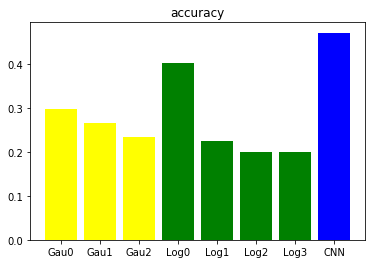

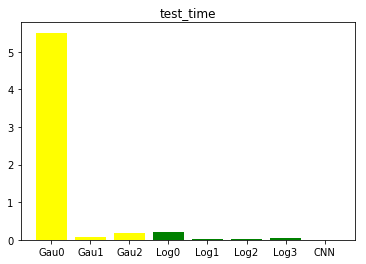

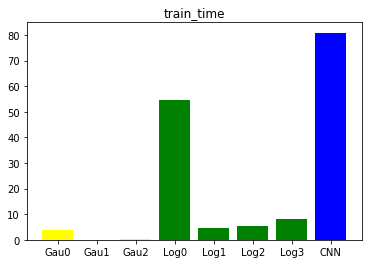

In [37]:
x=['Gau0','Gau1','Gau2','Gau0','Log0','Log1','Log2','Log3','CNN']
list_all_accuracy=[score_Gaus[0],score_Gaus[1],score_Gaus[2],score_Gaus[3],score_Logis[0],
                   score_Logis[1],score_Logis[2],score_Logis[3],temp_accurac_cnn]
list_all_test_time=[time_Gaus_test[0],time_Gaus_test[1],time_Gaus_test[2],time_Gaus_test[3],time_used_predict_Logis[0],
               time_used_predict_Logis[1],time_used_predict_Logis[2],time_used_predict_Logis[3],temptime_cnn_predict]
list_all_train_time=[time_used_Gau_all_fit[0],time_used_Gau_all_fit[1],time_used_Gau_all_fit[2],time_used_Gau_all_fit[3],
                   list_fit_time_Log[0],list_fit_time_Log[1],list_fit_time_Log[2],list_fit_time_Log[3],temp_CNN_time]
def plot_graph(x_value,y_value,title_name):
    plt.figure()
    plt.title(title_name)
    plt.bar(x=x_value, height=y_value,color=['yellow','yellow','yellow','yellow','green','green','green','green','blue'])

plot_graph(x,list_all_accuracy,"accuracy")
plot_graph(x,list_all_test_time,"test_time")
plot_graph(x,list_all_train_time,"train_time")

In [38]:
mat_logis_all

[array([[484,  46,  56,  41,  22,  30,  22,  50, 176,  73],
        [ 62, 486,  14,  32,  22,  35,  35,  52,  95, 167],
        [121,  44, 272,  85, 112,  93, 136,  68,  48,  21],
        [ 43,  56,  99, 257,  52, 192, 121,  54,  48,  78],
        [ 65,  23, 133,  58, 289,  95, 148, 125,  33,  31],
        [ 51,  46,  88, 151,  86, 342,  85,  78,  44,  29],
        [ 12,  33,  74, 117, 100,  87, 485,  40,  21,  31],
        [ 49,  49,  65,  50,  89,  79,  51, 442,  44,  82],
        [172,  77,  18,  27,  10,  51,   8,  16, 520, 101],
        [ 88, 190,  17,  20,  16,  28,  39,  48, 107, 447]], dtype=int64),
 array([[285,  46, 144, 112,  64, 125,  64,  85, 135,  67],
        [ 62, 220,  39, 103,  51,  69,  82, 100, 108, 154],
        [111,  62, 222,  63, 181,  74, 111,  81,  41,  23],
        [ 50,  79,  69, 138,  76, 103,  97,  65,  30,  51],
        [ 33,  27, 146,  67, 242,  68, 125, 101,  20,  20],
        [ 55,  31,  66, 136,  66, 228,  77, 116,  54,  36],
        [ 49, 113, 144, 1

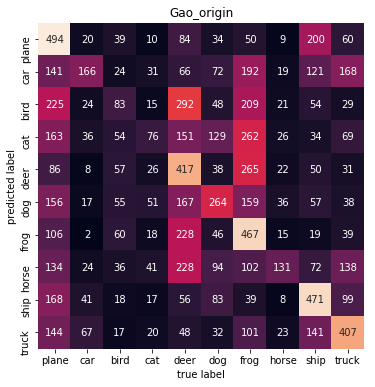

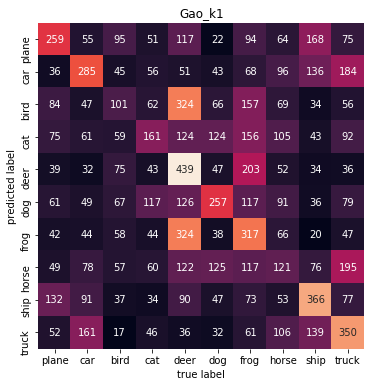

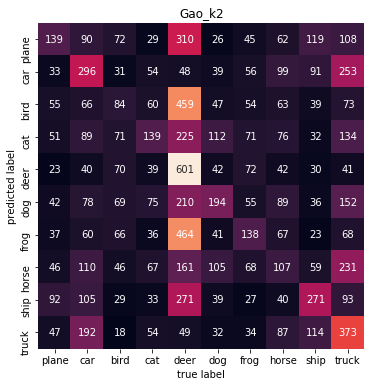

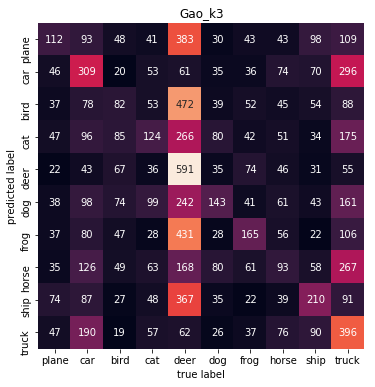

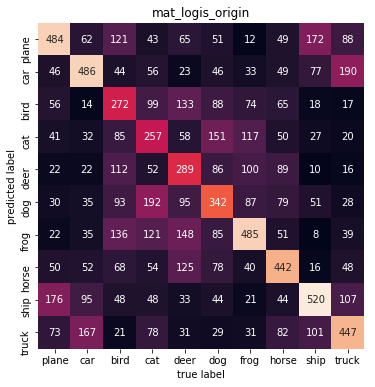

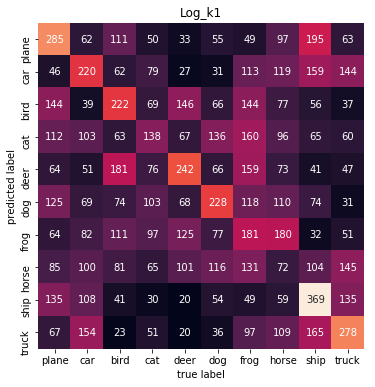

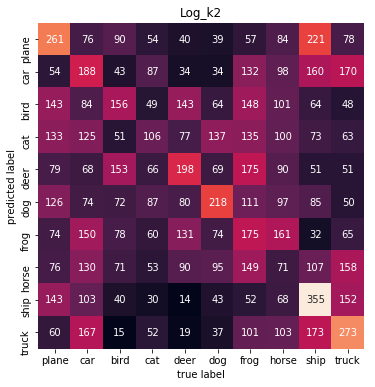

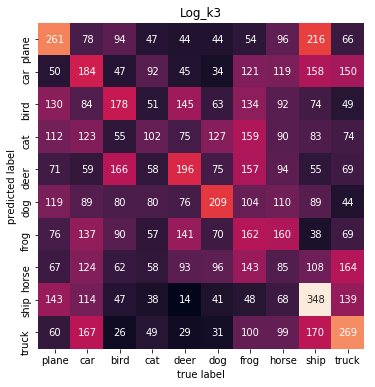

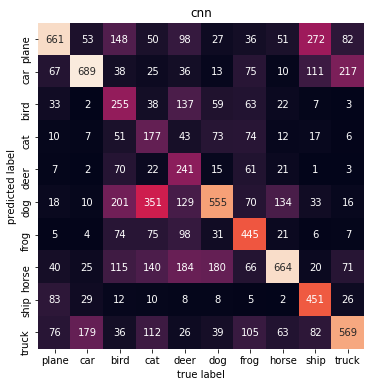

In [39]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
import seaborn as sns;
def plot_confusion_matrix(mat,title):
    plt.figure(figsize=(9,6))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.title(title)
    plt.show()

plot_confusion_matrix(mat_Gao[0],"Gao_origin") 
plot_confusion_matrix(mat_Gao[1],"Gao_k1") 
plot_confusion_matrix(mat_Gao[2],"Gao_k2") 
plot_confusion_matrix(mat_Gao[3],"Gao_k3") 
plot_confusion_matrix(mat_logis_all[0],"mat_logis_origin") 
plot_confusion_matrix(mat_logis_all[1],"Log_k1") 
plot_confusion_matrix(mat_logis_all[2],"Log_k2") 
plot_confusion_matrix(mat_logis_all[3],"Log_k3") 
plot_confusion_matrix(xx_mat_cnn,"cnn") 

Question 3f


    1. using the LogisticRegresion Model to train the original data,I got warning of "ConvergenceWarning" , The problem is that regardless of the iterations chosen, I keep getting convergence warnings.

    2.LogisticRegression with original data DO take lots of time for me, while the iteartions is 100. So in this kind of Regression, while use the PCA is the best choice.

    3.The accuracy of CNN is greater higher than LogisticRegression and GaussianNB, but,the disadvantage is that CNN took more time in training process. that means the traditonal ML is quite slow and not accuracy.

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [40]:
#prepare the data for Q4
from tqdm import tqdm
import multiprocessing
#windows use spawn
multiprocessing.set_start_method('spawn', True)
trainset_final = torchvision.datasets.CIFAR10(root="./data", train=True,
                                            download=True, transform=transform)

testset_final = torchvision.datasets.CIFAR10(root="./data", train=False,
                                           download=True, transform=transform)
#transfer  10000 32 32 3  to 10000 3 32 32
testset_gt = torch.tensor(testset_final.data).permute(0, 3, 1, 2).float() / 255
testset_noise = testset_gt +  (scale * torch.randn(10000, 3, 32, 32))


Files already downloaded and verified
Files already downloaded and verified


In [41]:
#define autoencode
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [42]:
#test model
def test(model, epoch):
    print("Test>>>>>Test>>>>>Test>>>>>Test")
    #do notuse  BatchNormalization && Dropout
    model.eval()
    with torch.no_grad():
        criterion = nn.MSELoss()
        #use losses to store loss
        losses = []
        outputs = []
        for index, input in enumerate(tqdm(testset_noise)):
            target = testset_gt[index].unsqueeze(0).to(device)
            input = input.unsqueeze(0).to(device)
            pred = model(input)
            loss = criterion(target, pred)
            #add loses
            losses += [float(loss.cpu())]
            outputs.append((target, pred),)
        temp = sum(losses) / len(losses)
        print("Test mean loss: {}".format(temp))
    print('Test done..................')
    # save model
    check = {
            'epoch': epoch + 1,
            'model': model.state_dict()
        }
    filename = "epoch_{}.pth".format(epoch+1)
    torch.save(check, filename)
    if epoch >= max_epochs - 1:
        plt.figure(figsize=(20, 12))
        indexes = np.argsort(-np.array(losses))[:30].tolist()
        for ii, index in enumerate(indexes):
            plt.subplot(6, 10, 2 * ii + 1)
            gt, pred = outputs[index]
            # show ground thruth
            gt = gt.cpu().squeeze(0).permute(1, 2, 0).numpy()
            plt.imshow(gt)
            # show predict
            pred = pred.cpu().squeeze(0).permute(1, 2, 0).numpy()
            pred = np.clip(pred, 0, 1)
            plt.subplot(6, 10, 2 * ii + 2)
            plt.imshow(pred)
        plt.savefig('result1.png')
        plt.show()
    return temp


In [43]:
# train origin and nosie picture
def train(model, num_epochs=1, batch_size=64, learning_rate=1e-3):
    model.train()
    trainset_gt = torch.tensor(trainset_final.data).permute(0, 3, 1, 2).float() / 255
    noise = (scale * torch.randn(len(trainset_gt), 3, 32, 32))
    trainset_noise = trainset_gt + noise
    # train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    criterion = nn.MSELoss()
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=1e-5)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    test_result = []
    for epoch in range(num_epochs):
        for index in tqdm(range(len(trainset_noise) // batch_size)):
            start = index * batch_size
            end = (index + 1) * batch_size
            targets = trainset_gt[start:end].to(device)
            inputs = trainset_noise[start:end].to(device)
            recon = model(inputs)
            targets = targets.to(device)
            loss = criterion(recon, targets)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        print('Epoch:{}, Train loss:{:.4f}'.format(epoch+1, float(loss.cpu())))
        temp = test(model, epoch)
        test_result.append(temp)
    return test_result

In [44]:
#get cuda or cpu
cuda = torch.cuda.is_available()
device = torch.device('cuda:0' if cuda else 'cpu')

100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:26<00:00, 31.77it/s]


Epoch:1, Train loss:0.0115
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:43<00:00, 228.22it/s]


Test mean loss: 0.011707388820964844
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 32.55it/s]


Epoch:2, Train loss:0.0100
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 226.00it/s]


Test mean loss: 0.009824438658438158
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 31.62it/s]


Epoch:3, Train loss:0.0089
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 237.72it/s]


Test mean loss: 0.009010180105583276
Test done..................


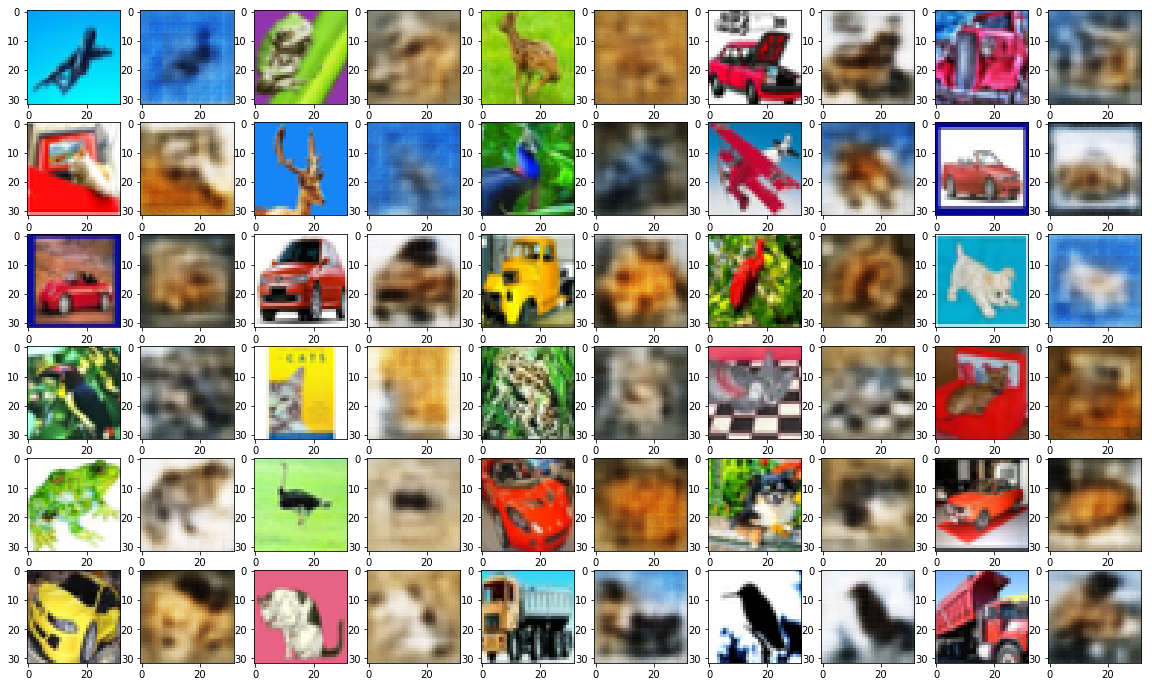

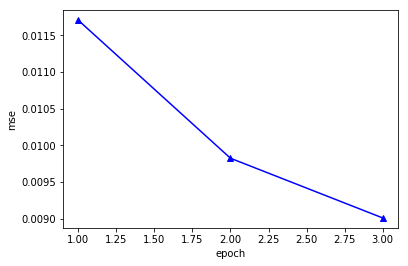

In [45]:
#the init learning_rate is 1e-3
max_epochs=3
model = Autoencoder().to(device)
# test(model, 30)
test_result = train(model, num_epochs=max_epochs)
x = [i+1 for i in range(len(test_result))]
plt.plot(x, test_result, 'b^-', label='mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.savefig("666.png")
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:25<00:00, 31.06it/s]


Epoch:1, Train loss:0.0118
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:44<00:00, 223.01it/s]


Test mean loss: 0.01228114652063232
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 32.26it/s]


Epoch:2, Train loss:0.0095
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 236.24it/s]


Test mean loss: 0.009946593585133086
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 30.75it/s]


Epoch:3, Train loss:0.0089
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 233.27it/s]


Test mean loss: 0.009151204649393913
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 33.52it/s]


Epoch:4, Train loss:0.0082
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:41<00:00, 240.74it/s]


Test mean loss: 0.008671646180737298
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 31.69it/s]


Epoch:5, Train loss:0.0082
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 237.13it/s]


Test mean loss: 0.008420667100779246
Test done..................


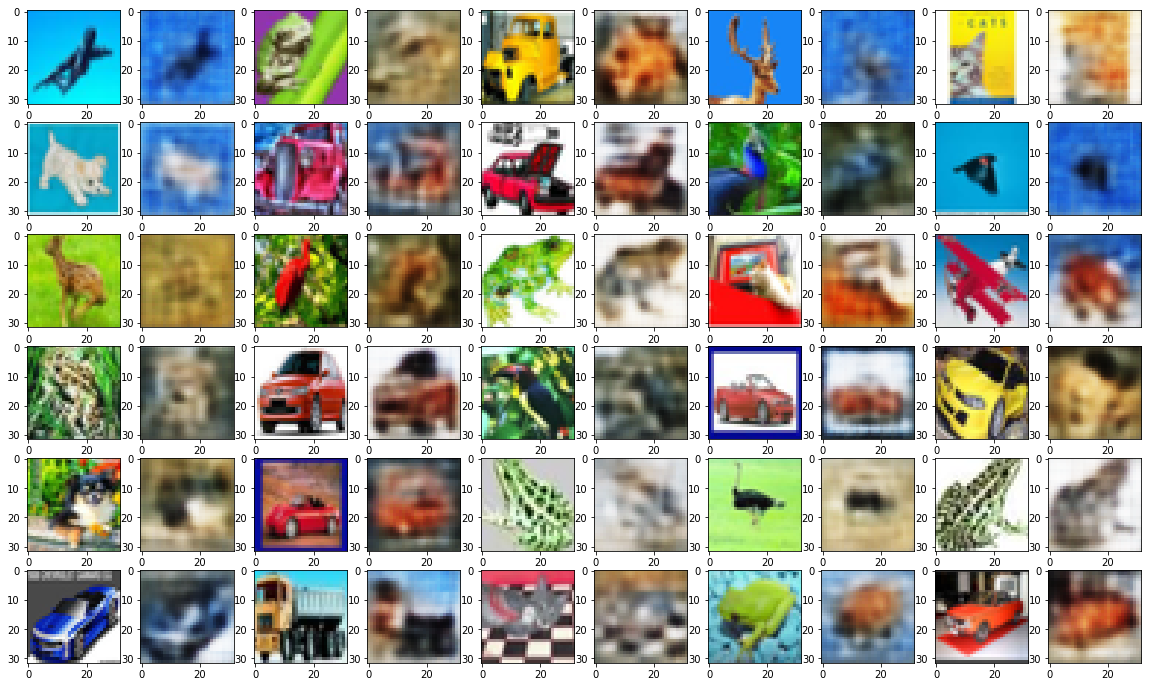

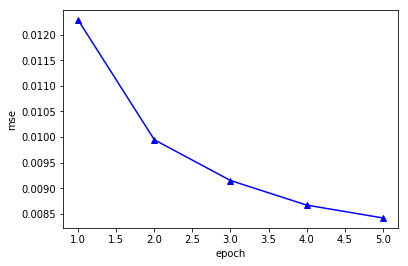

In [46]:
#the init learning_rate is 1e-3
max_epochs=5
model = Autoencoder().to(device)
# test(model, 30)
test_result = train(model, num_epochs=max_epochs,learning_rate = 1e-3)
x = [i+1 for i in range(len(test_result))]
plt.plot(x, test_result, 'b^-', label='mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.savefig("666.png")
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 31.34it/s]


Epoch:1, Train loss:0.0113
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:41<00:00, 240.24it/s]


Test mean loss: 0.01182967975048814
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 32.81it/s]


Epoch:2, Train loss:0.0094
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 234.61it/s]


Test mean loss: 0.009755818364664447
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 32.06it/s]


Epoch:3, Train loss:0.0086
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:41<00:00, 238.88it/s]


Test mean loss: 0.00896438000218477
Test done..................


100%|████████████████████████████████████████████████████████████████████████████████| 781/781 [00:24<00:00, 32.60it/s]


Epoch:4, Train loss:0.0083
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:41<00:00, 239.36it/s]


Test mean loss: 0.008636226951889694
Test done..................


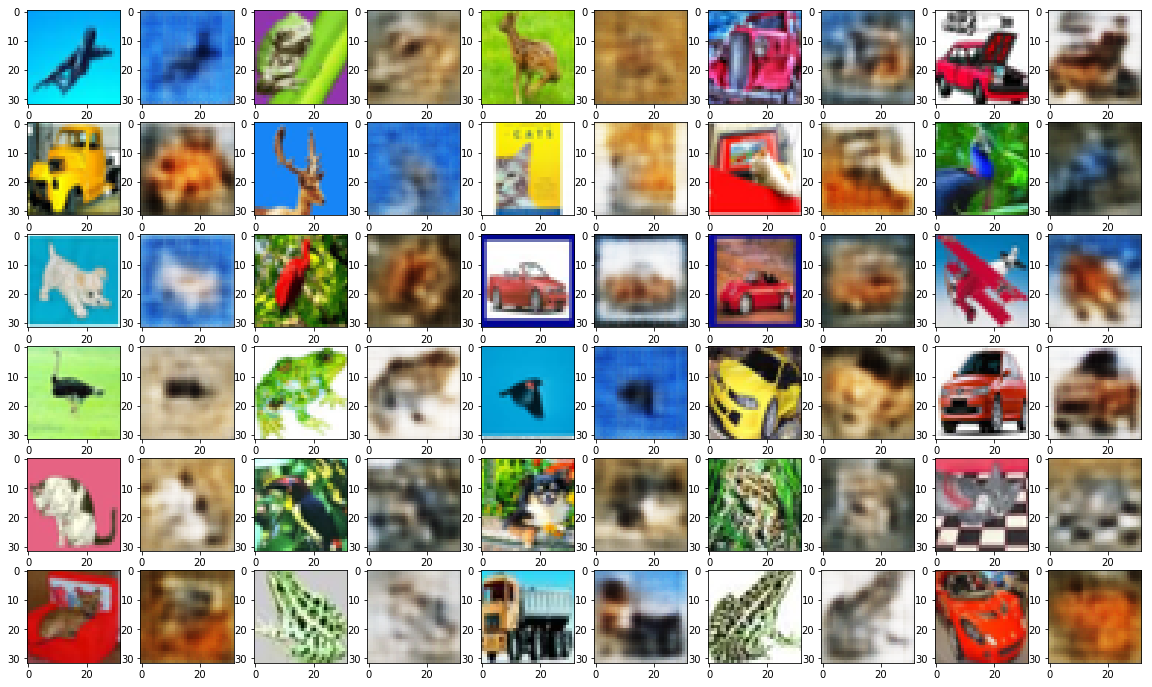

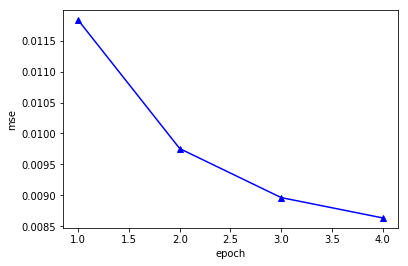

In [47]:
#the init learning_rate is 1e-3
max_epochs=4
model = Autoencoder().to(device)
# test(model, 30)
test_result = train(model, num_epochs=max_epochs,learning_rate = 1e-3)
x = [i+1 for i in range(len(test_result))]
plt.plot(x, test_result, 'b^-', label='mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.savefig("666.png")
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1562/1562 [00:37<00:00, 41.41it/s]


Epoch:1, Train loss:0.0106
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 234.16it/s]


Test mean loss: 0.010395873527380172
Test done..................


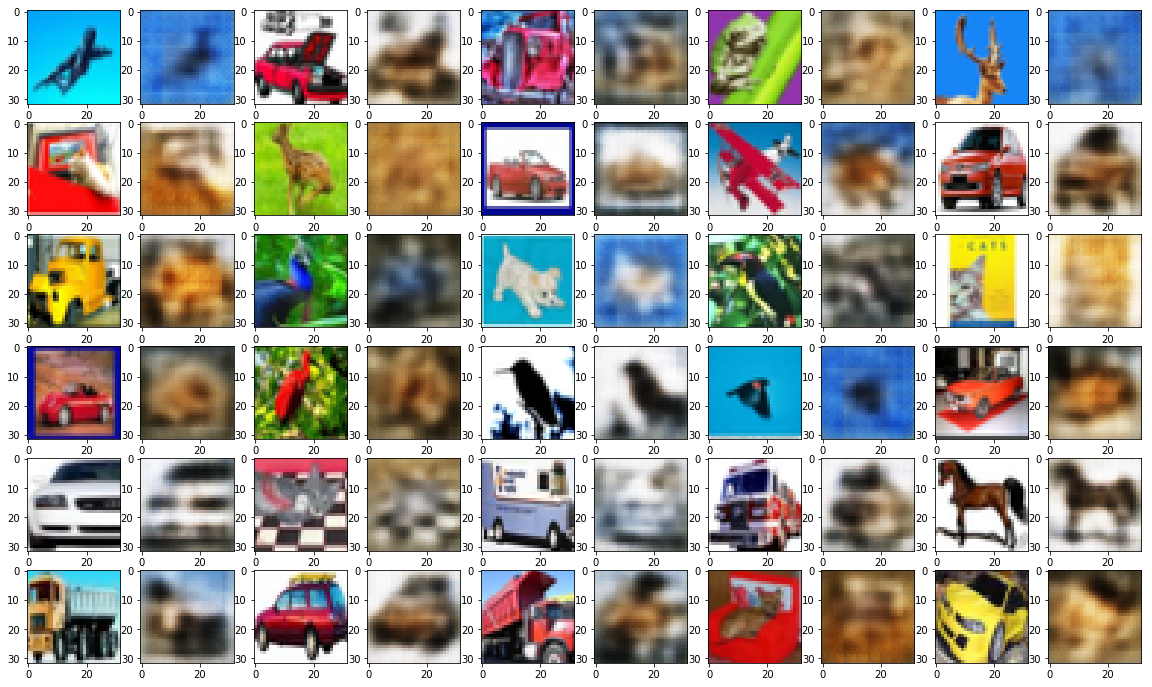

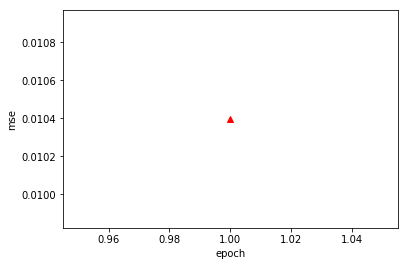

In [51]:
max_epochs=1
model = Autoencoder().to(device)
# test(model, 30)
test_result = train(model, num_epochs=max_epochs,batch_size=32)
x = [i+1 for i in range(len(test_result))]
plt.plot(x, test_result, 'r^-', label='mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.savefig("666.png")
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 3125/3125 [01:06<00:00, 46.09it/s]


Epoch:1, Train loss:0.0082
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 233.91it/s]


Test mean loss: 0.010032231396995484
Test done..................


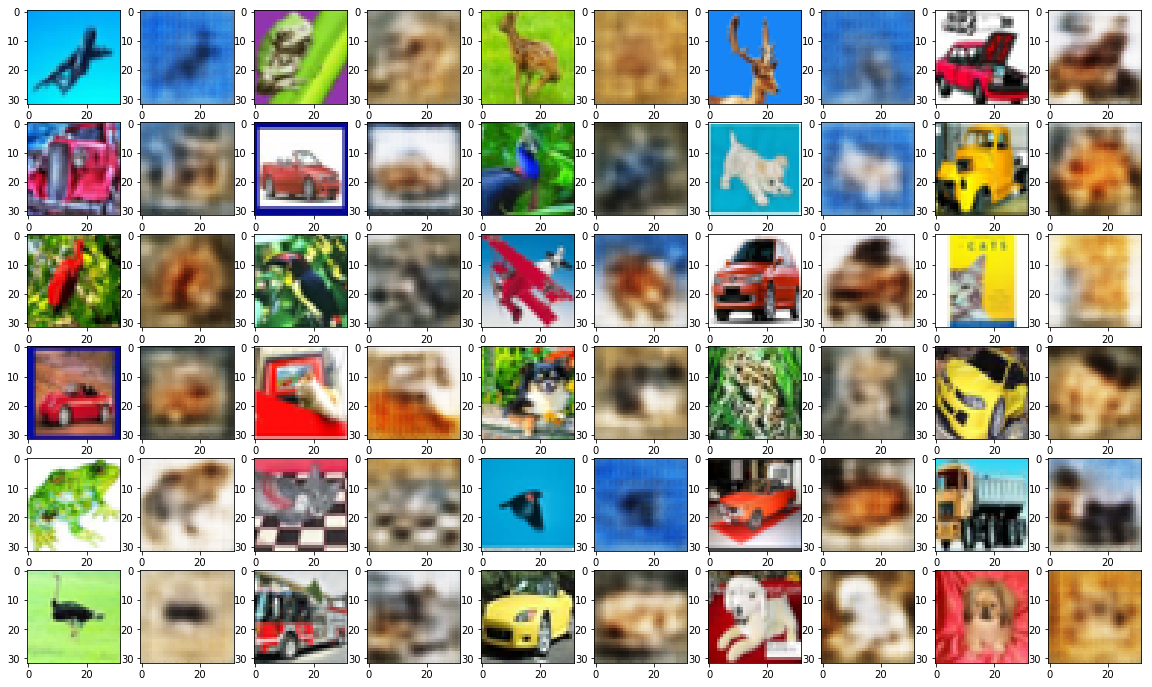

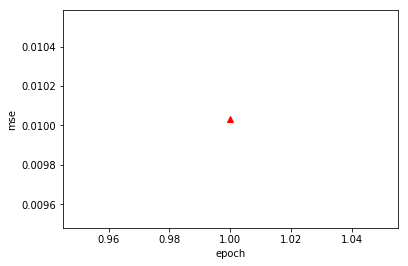

In [52]:
max_epochs=1
model = Autoencoder().to(device)
# test(model, 30)
test_result = train(model, num_epochs=max_epochs,batch_size=16)
x = [i+1 for i in range(len(test_result))]
plt.plot(x, test_result, 'r^-', label='mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.savefig("666.png")
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 6250/6250 [01:58<00:00, 52.60it/s]


Epoch:1, Train loss:0.0081
Test>>>>>Test>>>>>Test>>>>>Test


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 236.52it/s]


Test mean loss: 0.00897828515775036
Test done..................


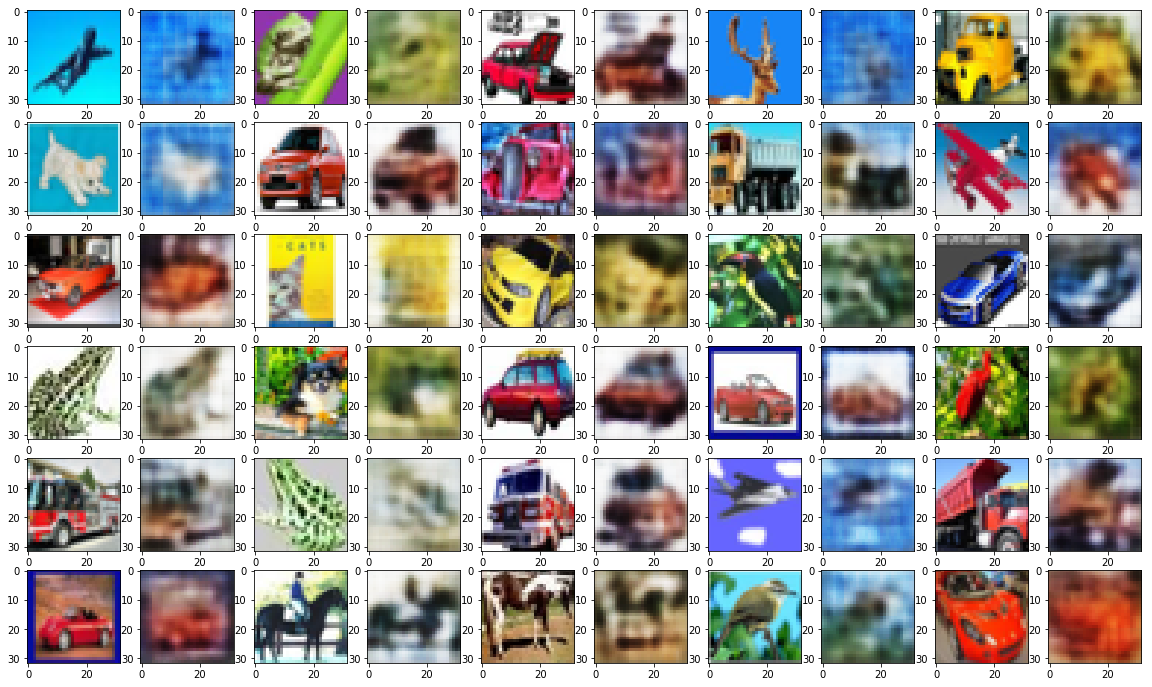

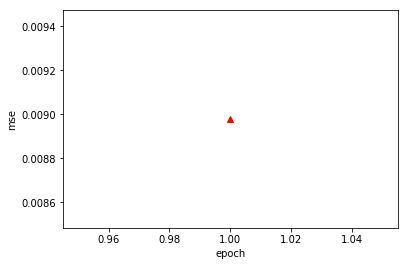

In [53]:
max_epochs=1
model = Autoencoder().to(device)
# test(model, 30)
test_result = train(model, num_epochs=max_epochs,batch_size=8)
x = [i+1 for i in range(len(test_result))]
plt.plot(x, test_result, 'r^-', label='mse')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.savefig("666.png")
plt.show()

Question 4f


    1. The epoch should not be 1,while I try to change the batchszie and keep the learning rate and epoch be the same, and the results show that when give the batchsize 8 show the testset predict quite well. 
    
    
    2. while I also change the learning rate to be small like 1e-4, or 1e-5, the results show the Long running time and poor convergence effect. So choose the suitable learning rate is also vital. Also ,try more epoch, the test loss become smaller and smaller , so that means if the cpu or gpu can work efficent, we can set the epoch bigger.